## Import librairies

In [47]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
from mlxtend.evaluate import bias_variance_decomp
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import label_binarize
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [36]:
# fetch dataset 
rt_iot2022 = fetch_ucirepo(id=942) 
# data (as pandas dataframes) 
X = rt_iot2022.data.features 
y = rt_iot2022.data.targets 

## Data Analysis

### Dataset Metadata

In [37]:
rt_iot2022.metadata

{'uci_id': 942,
 'name': 'RT-IoT2022 ',
 'repository_url': 'https://archive.ics.uci.edu/dataset/942/rt-iot2022',
 'data_url': 'https://archive.ics.uci.edu/static/public/942/data.csv',
 'abstract': 'The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios.\nIncorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers

### Variable information 

In [38]:
print(rt_iot2022.variables)

                    name     role         type demographic description units  \
0              id.orig_p  Feature      Integer        None        None  None   
1              id.resp_p  Feature      Integer        None        None  None   
2                  proto  Feature  Categorical        None        None  None   
3                service  Feature   Continuous        None        None  None   
4          flow_duration  Feature   Continuous        None        None  None   
..                   ...      ...          ...         ...         ...   ...   
80  fwd_init_window_size  Feature      Integer        None        None  None   
81  bwd_init_window_size  Feature      Integer        None        None  None   
82  fwd_last_window_size  Feature      Integer        None        None  None   
83           Attack_type   Target  Categorical        None        None  None   
84                    id       ID      Integer        None        None  None   

   missing_values  
0              no  

### Independent Variables

In [39]:
X

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,2.282415e+06,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,2.028307e+06,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,2.281904e+06,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,2.047288e+06,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,2.087657e+06,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,59247,63331,tcp,-,0.000006,1,1,0,0,167772.160000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123113,59247,64623,tcp,-,0.000007,1,1,0,0,144631.172400,...,6.914139e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123114,59247,64680,tcp,-,0.000006,1,1,0,0,167772.160000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123115,59247,65000,tcp,-,0.000006,1,1,0,0,167772.160000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024


### Target Variable

In [40]:
y

,Attack_type
0,MQTT_Publish
1,MQTT_Publish
2,MQTT_Publish
3,MQTT_Publish
4,MQTT_Publish
...,...
123112,NMAP_XMAS_TREE_SCAN
123113,NMAP_XMAS_TREE_SCAN
123114,NMAP_XMAS_TREE_SCAN
123115,NMAP_XMAS_TREE_SCAN


### Target Variable distribution

Attack_type               
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64


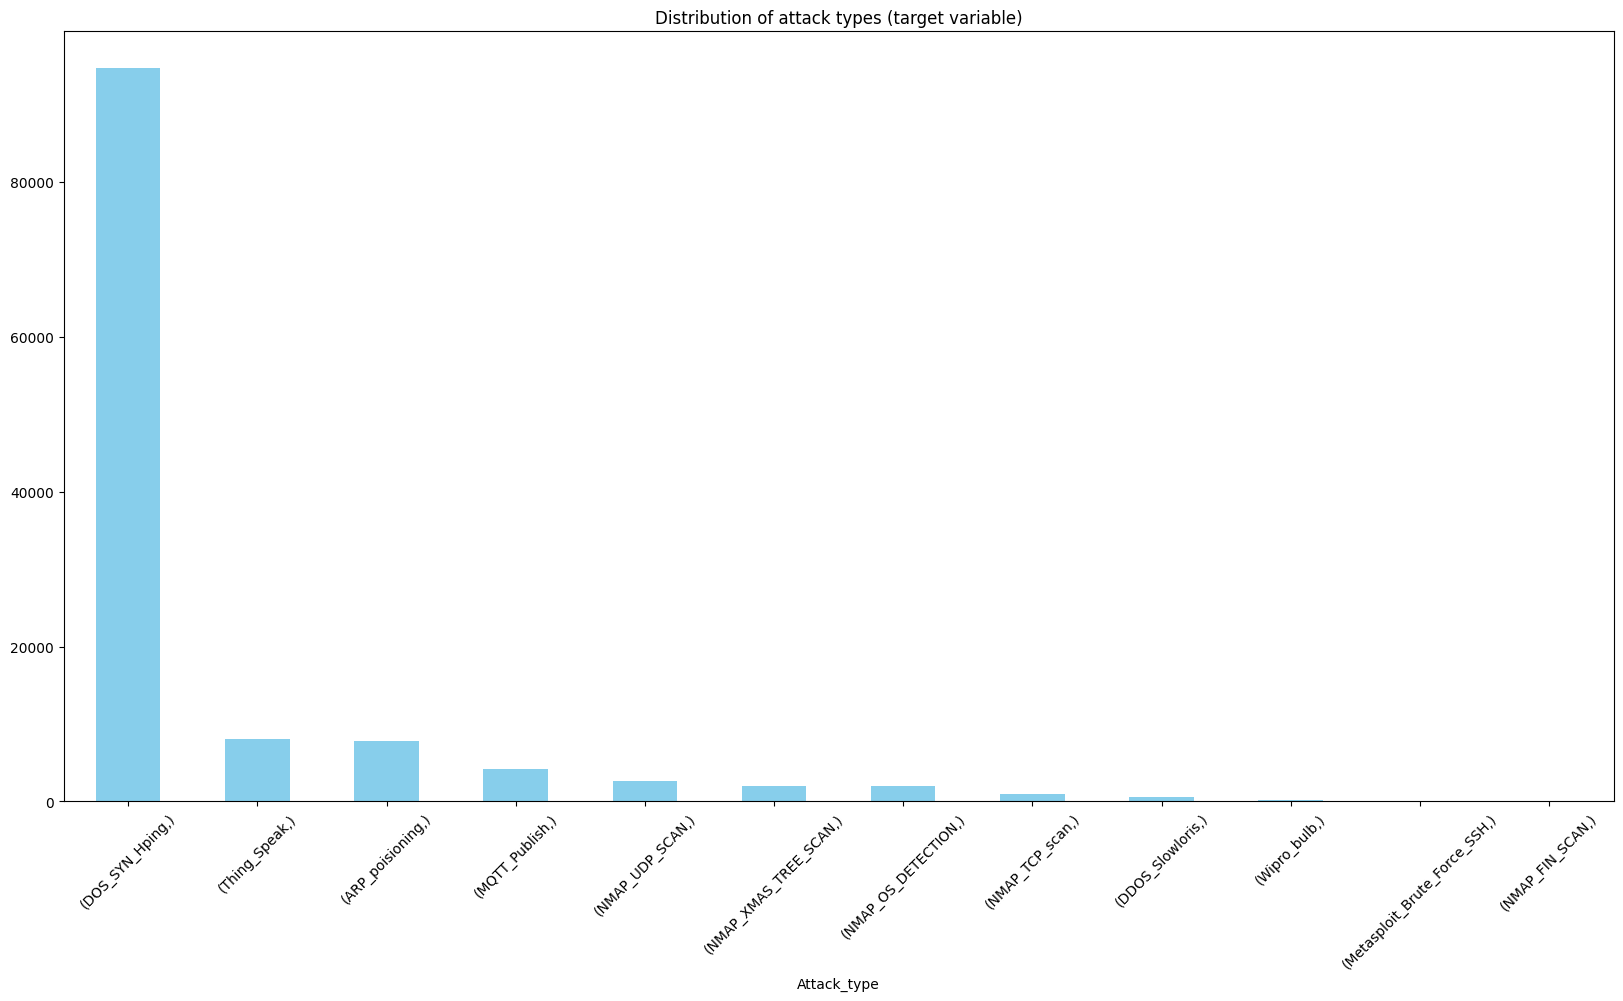

In [41]:
print(y.value_counts())
y.value_counts().plot(kind='bar', title='Distribution of attack types (target variable)', color='skyblue', figsize=(20, 10), rot=45)
plt.show()

### Independent Variable Correlation

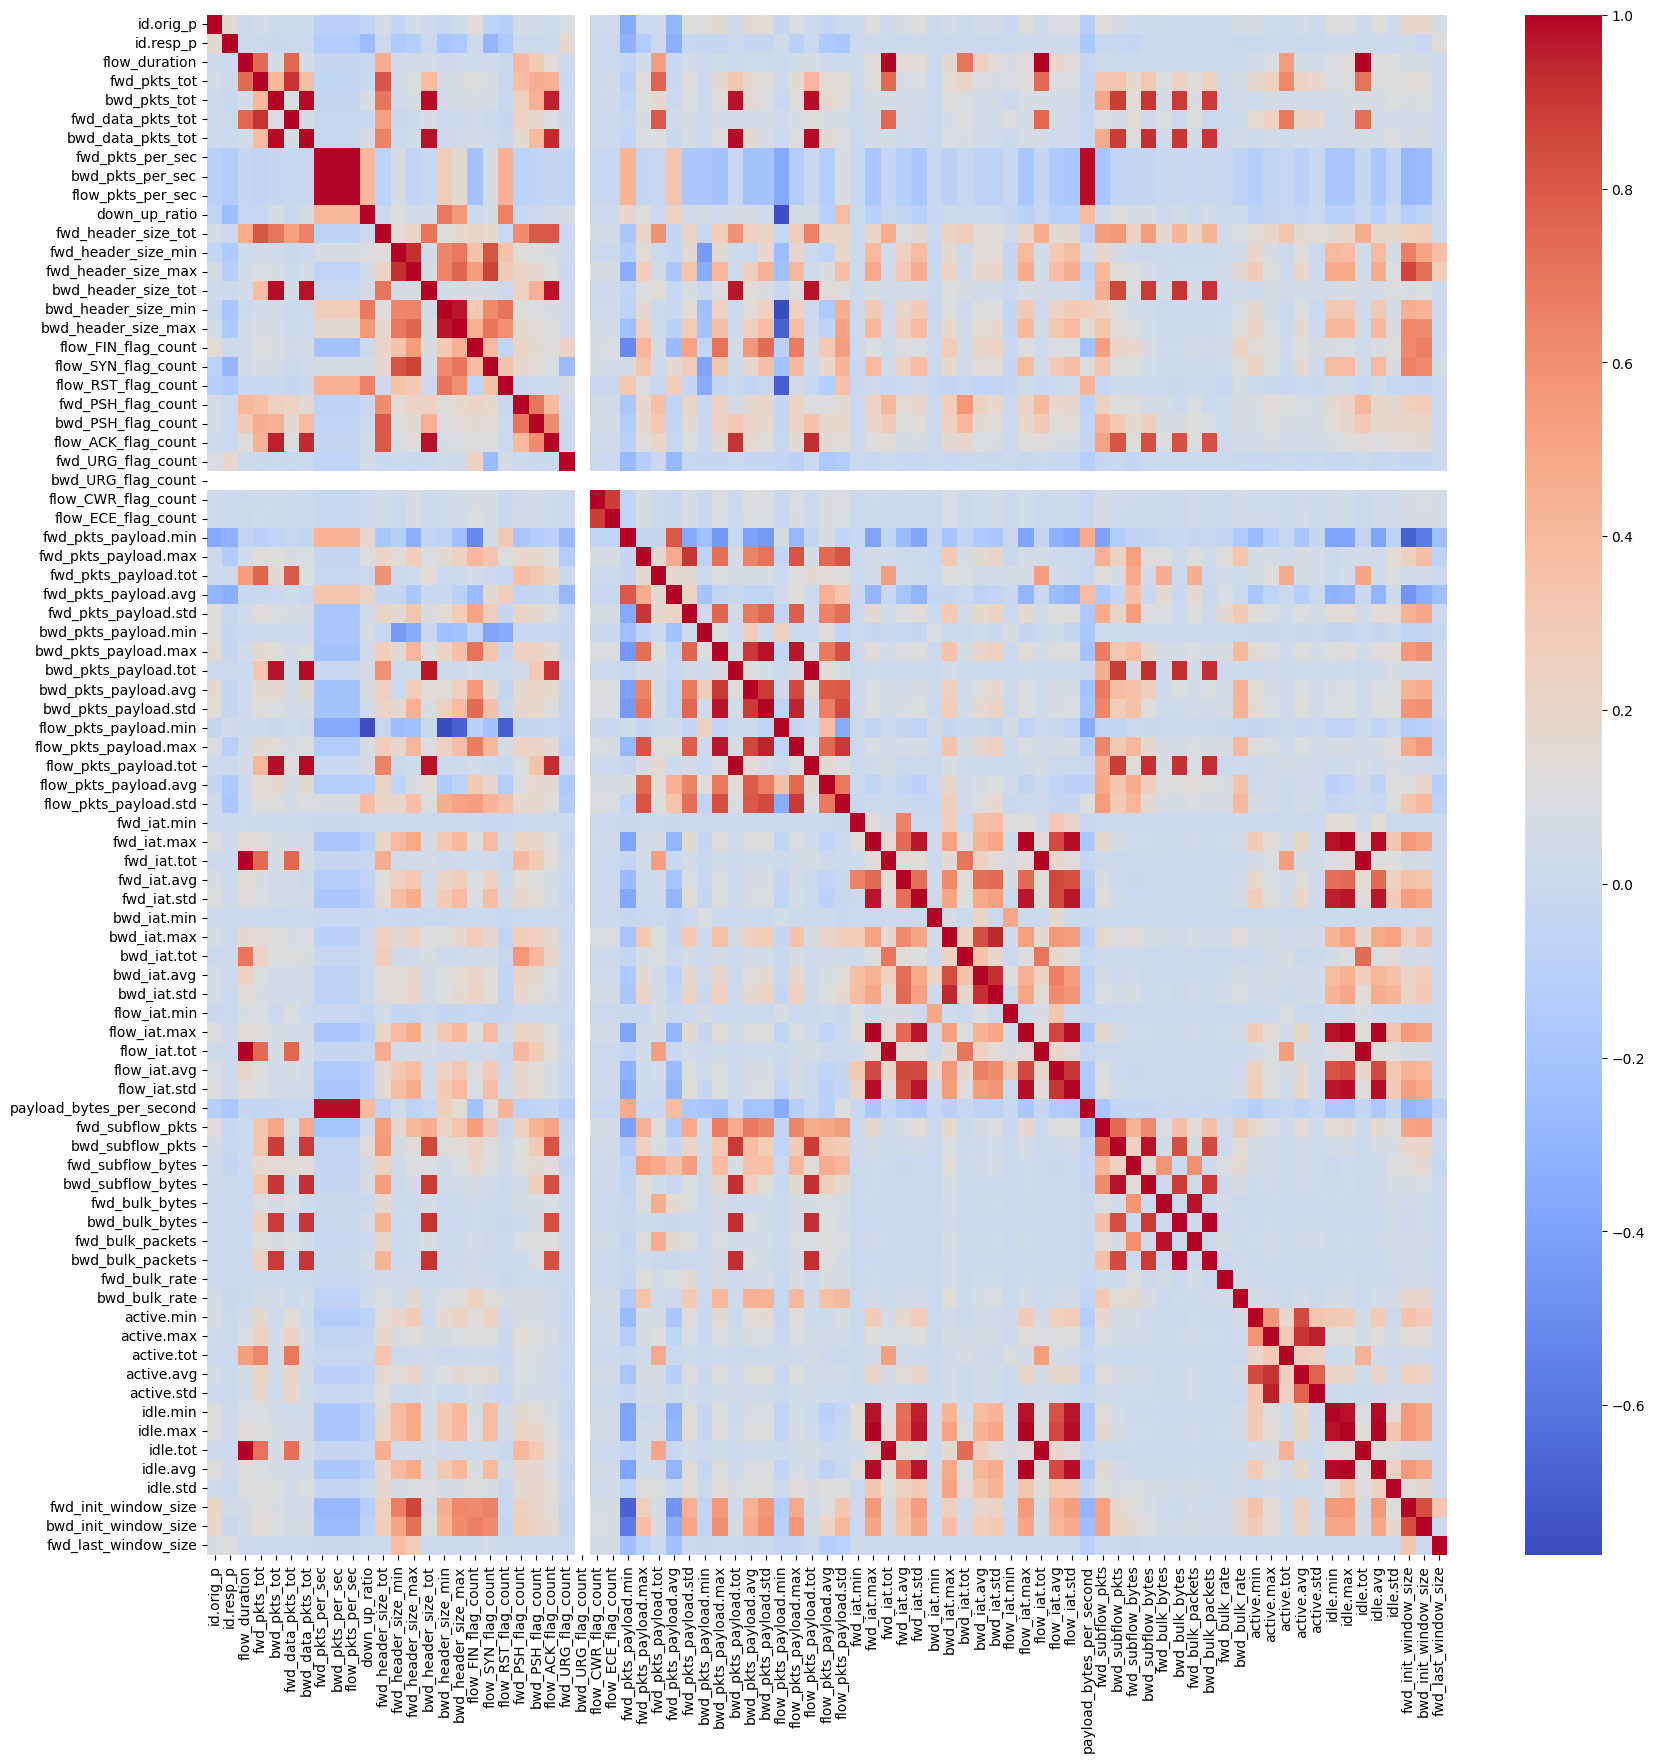

In [42]:
numeric_columns = X.select_dtypes(include=[np.number]) 

correlation = numeric_columns.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.show()

## Data Preprocessing

### label encoding

In [43]:
le = LabelEncoder()
X['proto'] = le.fit_transform(X['proto'])
X['service'] = le.fit_transform(X['service'])
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

y_encoded = le.fit_transform(y)

### Data splitting

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y_encoded, test_size = 0.25, random_state = 42)

## Model Training

In [ ]:
xgboost_model = XGBClassifier()

xgboost_model.fit(X_train, y_train)

## Results analysis

### Numerical Metrics

In [54]:
y_pred = xgboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# ROC curve multi-class classification
y_prob = xgboost_model.predict_proba(X_test)
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the TP, TN, FP, FN values
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP).sum()

# Get the bias and variance of the classifier
loss, bias, var = bias_variance_decomp(xgboost_model,X_train, y_train,X_test, y_test,loss='0-1_loss',random_seed=23)

# Print the evaluation metrics
print("Loss:", loss)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("TP:", TP.sum())
print("TN:", TN.sum())
print("FP:", FP.sum())
print("FN:", FN.sum())
print("AUC:", macro_roc_auc_ovo)
print("Bias:", bias)
print("Variance:", var)

Loss: 0.002450617283950617
Accuracy: 0.9980181936322288
Precision: 0.9980237245553085
Recall: 0.9980181936322288
F1 Score: 0.9980165078293497
TP: 30719
TN: -61
FP: 61
FN: 61
AUC: 0.9985516727199392
Bias: 0.0018843404808317088
Variance: 0.0011655295646523717


### Classification Report

In [45]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.984702,0.989749,0.987219,1951.000000
1,0.984962,0.992424,0.988679,132.000000
2,1.000000,1.000000,1.000000,23622.000000
3,0.999067,0.999067,0.999067,1072.000000
4,0.777778,0.777778,0.777778,9.000000
5,1.000000,0.800000,0.888889,5.000000
6,1.000000,1.000000,1.000000,509.000000
7,1.000000,0.996198,0.998095,263.000000
8,0.993528,0.980831,0.987138,626.000000
9,1.000000,0.993865,0.996923,489.000000


### Confusion Matrix

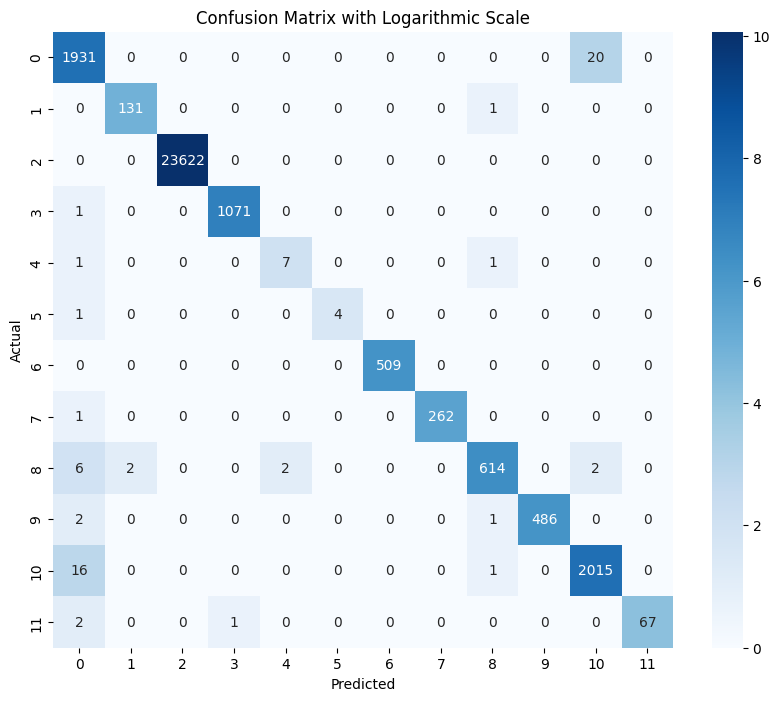

In [46]:
cm = confusion_matrix(y_test, y_pred)

# Apply logarithmic scale
log_confusion_matrix = np.log1p(cm)

# Plot confusion matrix with logarithmic scale
plt.figure(figsize=(10, 8))
sns.heatmap(log_confusion_matrix, annot=cm, fmt='g', cmap='Blues')
plt.title('Confusion Matrix with Logarithmic Scale')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC Curve

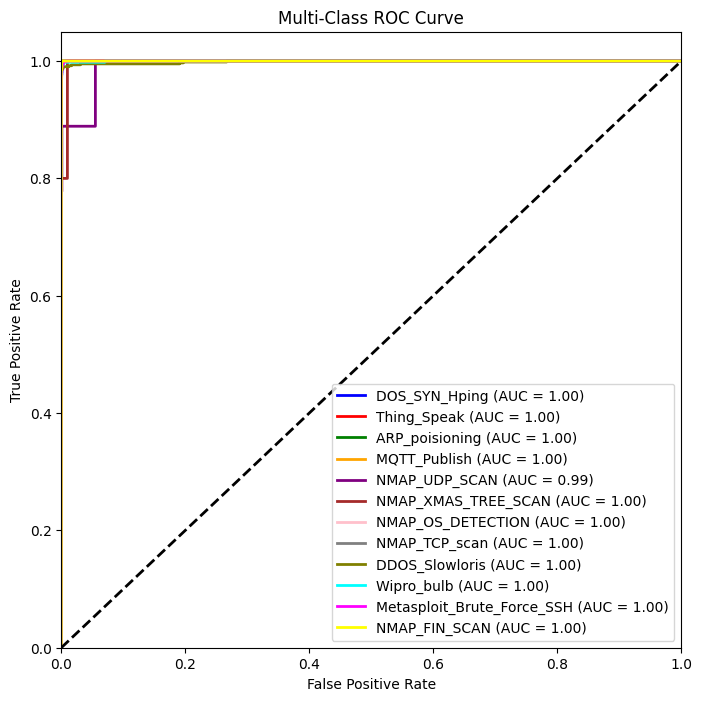

In [53]:
# Binarize the labels
y_bin = label_binarize(y_test, classes=np.unique(y_test))

y_prob = xgboost_model.predict_proba(X_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 8))

classes = [
    "DOS_SYN_Hping",                 
    "Thing_Speak",                    
    "ARP_poisioning",                
    "MQTT_Publish",                  
    "NMAP_UDP_SCAN",                
    "NMAP_XMAS_TREE_SCAN",          
    "NMAP_OS_DETECTION",             
    "NMAP_TCP_scan",                
    "DDOS_Slowloris",                
    "Wipro_bulb",                     
    "Metasploit_Brute_Force_SSH",       
    "NMAP_FIN_SCAN"
]

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='{0} (AUC = {1:.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()